# Scientific Python Bootcamp Day 2
Prepared and presented by John Russell

Notebook available on [GitHub](https://github.com/Hekstra-Lab/scientific-python-bootcamp)

### Topics for the day
- Writing of functions 
- Advanced plotting
- Advanced indexing
- Solving differential equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#These are some matplot lib configurations that I like to use. 
mpl.rc("font", family = "serif") #Serif font in matplotlib
mpl.rc("figure",figsize=(9,6)) #Increase default figure size
%config InlineBackend.figure_format = 'retina' #Render the plots more nicely

# #the below make plots look better if youre using the dark theme for jupyter
# mpl.style.use('dark_background') #Use a dark background for matplotlib figures 
# plt.rcParams.update({"figure.facecolor": "111111", 
#                      "savefig.facecolor": "212121"})

### Warmup: Plot a function

Make a plot showing the function $ f(x) = e^{-x^2}\sin(x)$ for $-3 \leq x \leq 3$.

In addition to plotting the curve itself, place the equation for $f(x)$ in the title of the graph and label the $x$ and $y$ axes.

**Hints**
- We need a *linearlly spaced* set of points to be our x values.
- Big loops are bad! Can you use numpy to apply this function to all the x values at once?

### Making lots of plots

Now lets consider a set of functions characterized by two paramters $a$ and $b$. We can write:

$$f(x;a,b) = e^{-ax^2}\sin(bx).$$

Notice that the last function we plotted was part of this family with $a=b=1$. Plot this function for all combinations of $a=(1,2,3)$ and $b=(6,7,8)$ on the same axes.

*Hints*
- You should plot 9 curves total (a=1, b=6; a=1, b=7; a=1, b=8; a=2, b=6; ...)

### Let's put our function into a python function (seems fitting right?)

In [2]:
#A simple function that takes 2 inputs x and y and *returns* 2x+3y
def my_fxn(x,y):
    pass

In [4]:
my_fxn(2,6)

In [5]:
#generalize my_fxn to compute ax+by for any a and b
def my_general_fxn(x,y,a,b):
    pass

In [ ]:
my_general_fx(2,6,2,3)

In [ ]:
# make the wavelet function from the first exercies that takes x, a, b as arguments 

The functions above do not even scratch the surface of what a function can do. Today we will focus on implementing mathematical functions but in general, python functions can contain arbitraty python operations. Good code organizes sensible chunks of work into many smaller functions and then composes these smaller functions into high level operations. More on this tomorrow but as a rule of thumb: *if you go to copy paste some of your code a third time, you should turn that piece of code into a function.*

**Note** If you ever want to share your functions with other people:
- Add docstrings so people know what the functions do and what the arguments should be
- Build in checks to make sure that all the arguments are the right types, shapes, etc
- Give your functions reasonable names - there are only so many `f1(x)`, `f2(x)`, ... one can keep straight

### Exercise

Write a function that takes three arguments `arr`, `odd_mult`, `even_mult`. and multiplies the odd elements of `arr` by `odd_mult` and the even elements by `even_mult`. `arr` will be a one-dimensional array. What will this function do if given a higher dimensional array?

**Bonus:** Add an if statement to check that `arr` is only one-dimensional. If it is not print an explanatory error. 

## Solving Ordinary Differential Equations (ODEs)

In a calculus class you have probably encountered differential equations and learned to solve a small set of them by hand. ODEs are ubiquitous in science and applied math but it is much easier to write down an ODE than it is to solve it. Luckily, tremendous amounts of work have been put into developing computational methods for solving ODEs and luckier still, scipy implements many of the best algorithms so you can use them without knowing the finer points of numerical integration.

Let's start by considering the ODE

$$ \frac{dy}{dt} = y.$$

- Recall from calculus that we also need to provide an initial value. Let's take $y(0)=1$

Use this space to take any notes about solving ODEs if you would like. 

In [3]:
from scipy.integrate import solve_ivp 

In [4]:
solve_ivp()

TypeError: solve_ivp() missing 3 required positional arguments: 'fun', 't_span', and 'y0'

In [5]:
# fun 
def dydt(t,y):
    pass
#t_span

#y0

In [ ]:
# solve for t=0-10 with y(0)=1
sol0 = solve_ivp()

In [ ]:
#Plot numerical and analytical
plt.plot(label='Numerical')
plt.plt(label='Analytical')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title("Exponential Growth", fontsize=20)
plt.legend()
plt.show()


## A slightly more complicated example

Here is an ODE that can be used to model population growth where there is some resource that eventually limits population size:

$$\frac{dP}{dt} = rP(t) \left[1-P(t)/K\right].$$

In this equation $r$ represents a growth rate and $K$ represents the population limit. I'll use $r=0.6$ and $K=100$ and solve for $ 0 \leq t \leq 25$ with 500 time points.

In [33]:
# dPdt

#P0

In [40]:

sol1 = solve_ivp(, method='DOP853')
# numerical analysis nerds like this method since it is highly accurate
# solve_ivp documentation has a good guide to which method to use 
# RK45 is the default and a very good choice most of the time.

In [ ]:
plt.plot(sol1.t,sol1.y[0])
plt.title('Numerical Solution to a Differential Equation',fontsize=18)
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

**Question** Why are we using `t_eval` when it isn't required?

In [ ]:
# sol2 = solve_ivp(dPdt, t_span=(0,25), y0=P0, method='DOP853')

# Also check out the solve_ivp documentation about rtol and atol 

### Exercise

Numerically solve the same equation as above but with $(r,K) = (0.6, 80), (0.6, 150), (1.2, 80), (1.2, 150).$ Plot all of the solutions on the same axes and label each curve with its $r$ and $K$ value.

*Hint* One bad way to do this is to define four different derivative functions with each of the different parameter values "hard coded".
Instead you should define a new derivative equation to take $r$ and $k$ as additional arguments. Then have a look at the `solve_ivp` function documentation especially the `args` argument.

In [22]:
def gen_dPdt(t, P, r, K):
    pass

In [23]:
#solve the ODE

In [24]:
#make the plot

### Solving Systems of ODEs

Solving single variable ODEs is great and all but a lot of the time we have coupled ODEs. A very famous example is the Lorenz Equations:

$$ \frac{dx}{dt} = \sigma(y-x)$$
$$ \frac{dy}{dt} = x(\rho-z) - y$$
$$ \frac{dz}{dt} = xy- \beta z$$

Scipy's ODE solver can handle such equations. The important thing is that we don't define the derivatives separately. Rather we make an array containing $x,y$, and $z$ and define the derivative function to return an array containing $\frac{dx}{dt}, \frac{dy}{dt}, \text{and} \frac{dz}{dt}$.

In [15]:
def lorenz(t, r, rho, sigma, beta):
    x,y,z = r
    dxdt = sigma*(y-x)
    dydt = x*(rho-z) - y
    dzdt = x*y-beta*z
    return np.array([dxdt, dydt, dzdt])

In [16]:
#use ρ = 28, σ = 10, and β = 8/3
init_vals = np.array([1,1,1])
lorenz_sol = solve_ivp(lorenz, (0,100), init_vals, t_eval = np.linspace(0,100,50000), args=(28, 10, 8/3))

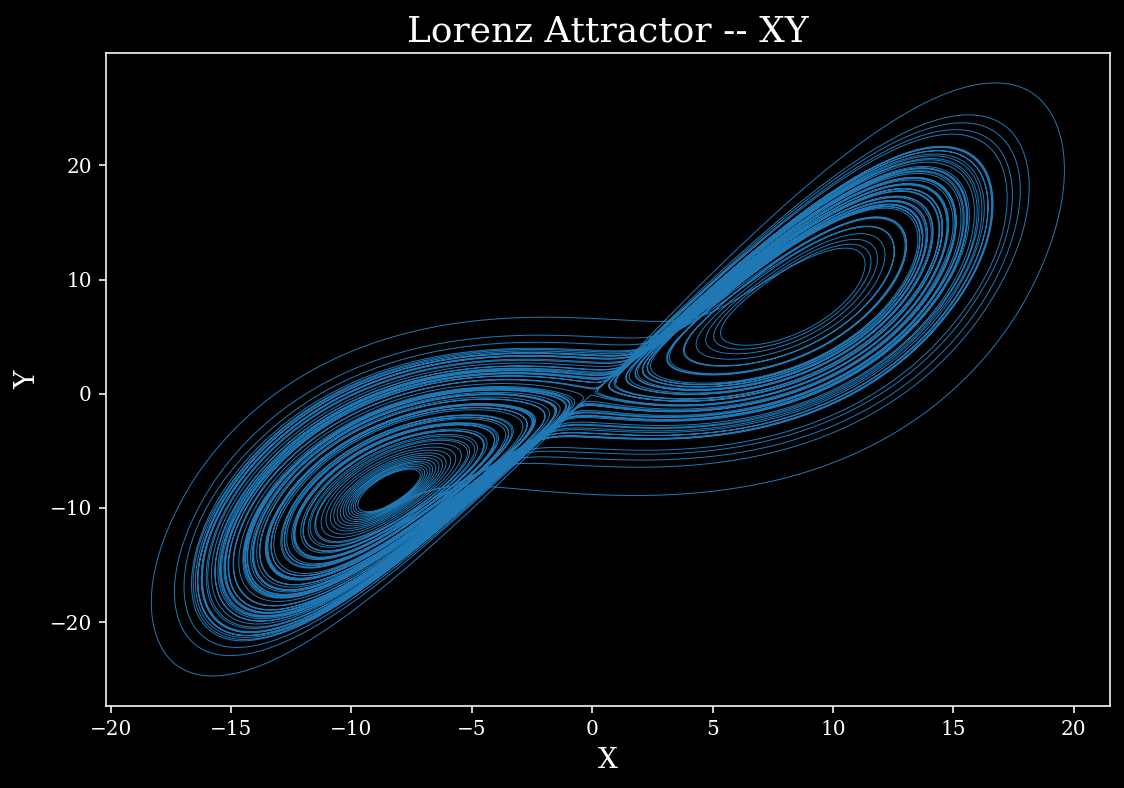

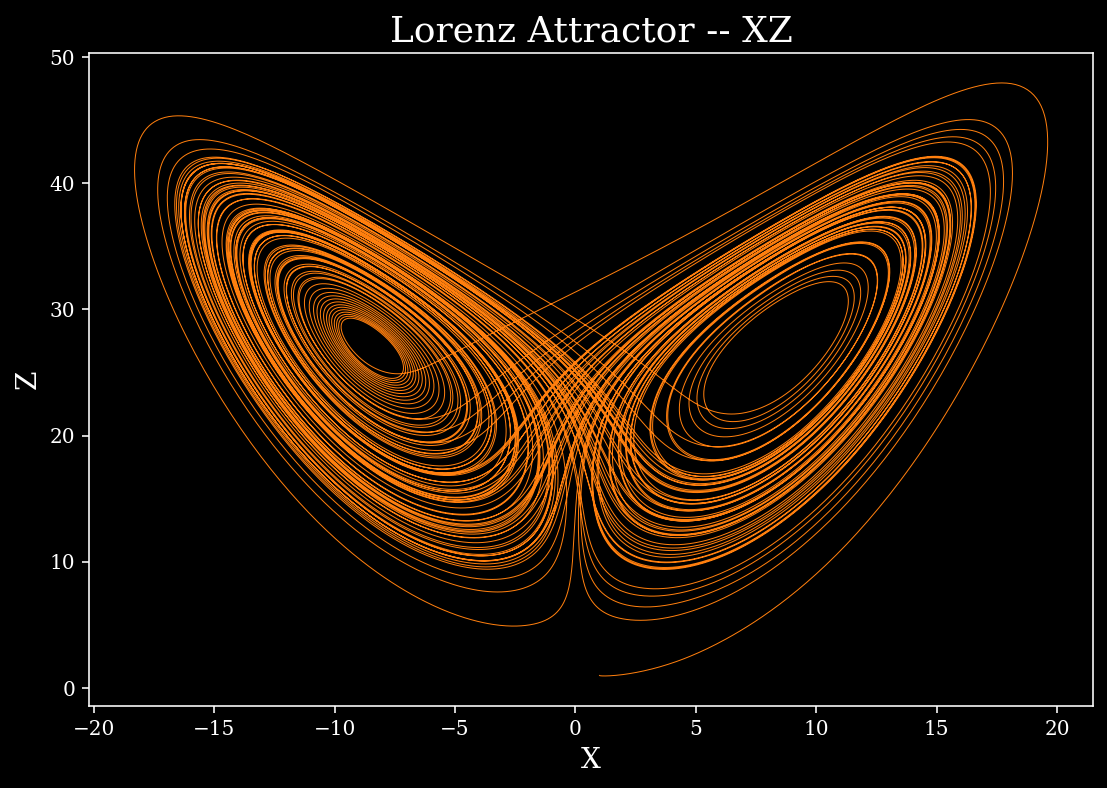

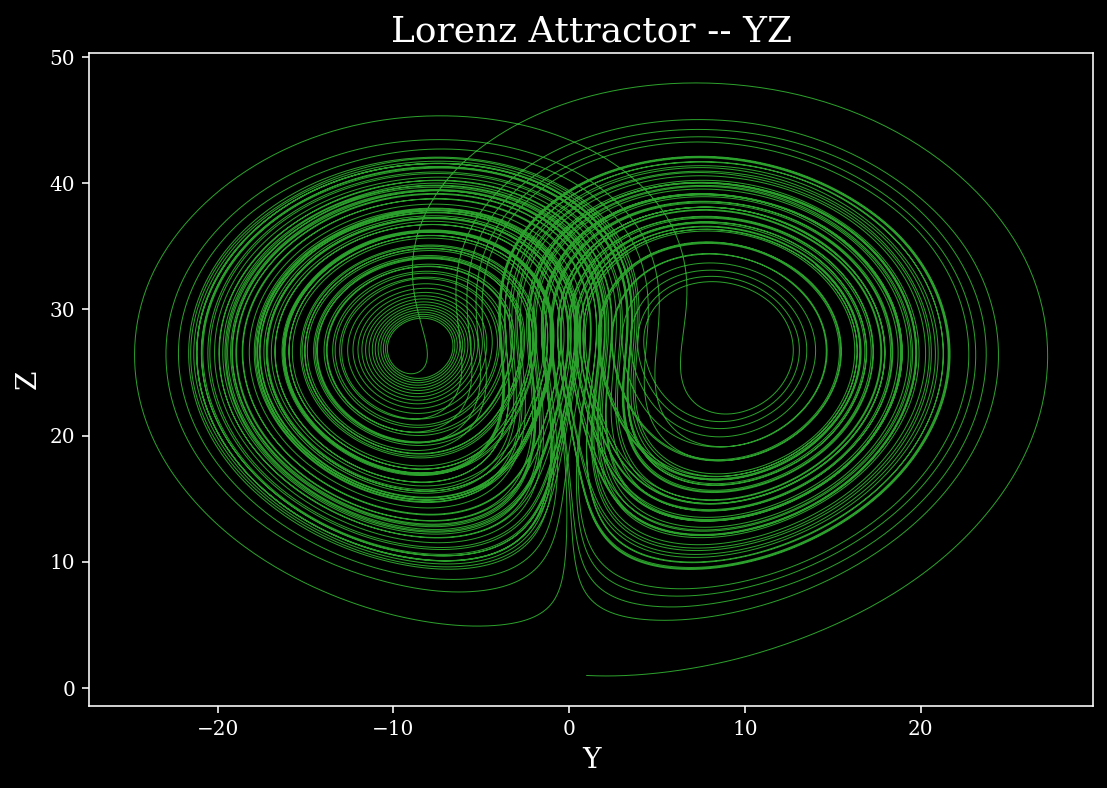

In [18]:
plt.plot(lorenz_sol.y[0], lorenz_sol.y[1], linewidth=0.5, c='tab:blue')
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title(r'Lorenz Attractor -- XY', fontsize=18)
plt.show()
plt.plot(lorenz_sol.y[0], lorenz_sol.y[2], linewidth=0.5, c='tab:orange')
plt.xlabel('X', fontsize=14)
plt.ylabel('Z', fontsize=14)
plt.title(r'Lorenz Attractor -- XZ', fontsize=18)
plt.show()
plt.plot(lorenz_sol.y[1], lorenz_sol.y[2], linewidth=0.5, c='tab:green')
plt.xlabel('Y', fontsize=14)
plt.ylabel('Z', fontsize=14)
plt.title(r'Lorenz Attractor -- YZ', fontsize=18)
plt.show()


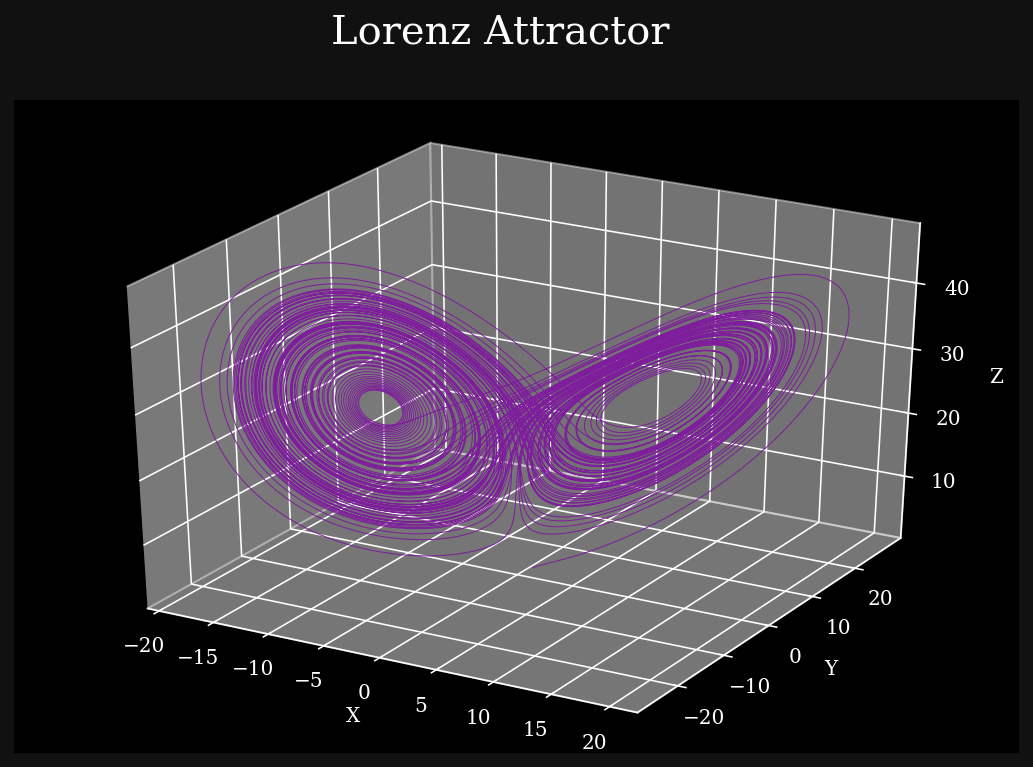

In [24]:
# Probably beyond the scope of this bootcamp but just to show you that its possible
#I google "matplotlib 3d plot example" every single time I do this
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.suptitle(r"Lorenz Attractor", fontsize=20)
ax.plot(lorenz_sol.y[0],lorenz_sol.y[1],lorenz_sol.y[2], linewidth=0.5,c='xkcd:purple')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### Exercise: Rabbits and foxes

Consider a model for a population of rabbits and a population of foxes that live in the same area. The equations for the number of rabbits and foxes at any given time are:

$$ \frac{dR}{dt} = aR(1-R/R_{max}) - bRF$$
$$ \frac{dF}{dt} = -cF + dRF$$

Solve this system of differential equations with $a = 1.5, b = 1, c=0.5, d =  0.3,$ and  $R_{max}=200$. Generate a solution for times $0 \leq t \leq 100$ and evaluate it at 5000 time points Lets say there are initially 20 rabbits and 5 foxes. Make two plots of the solution:
1. R(t) and F(t) on the same axes. Use a title for the graph and label each curve.
2. R on the horizontal axis and F on the vertical axis

In [25]:
#define the function

In [26]:
#solve the ode

In [72]:
#plot R(t). F(t)

In [73]:
#plot F vs R

### A mathematical trick that is crucial to numerically solving ODEs

So far we have only considered **First Order** ODEs, that is the highest derivative of each function that appears in any of the equations in the first derivative. It would seem at first blush that `solve_ivp` does not support solving higher order ODEs. While technically true, there is a workaround.

Lets consider the second order ODE 

$$ \frac{d^2x}{dt^2} + 2 \gamma \frac{dx}{dt} + x = 0.$$

This is the equation of motion (i.e. $F=ma$ for the physicists) of a mass attached to a spring and also experiencing friction as it moves, I've rewritten it compared to what you would probably write but thats just to have fewer constants floating around.

**The Trick**

We have seen that `solve_ivp` has no problem with systems of differential equations so we will introduce a new variable to rewrite the second order equation as two first order equations. This may seem crazy but consider a new variable $ v = \frac{dx}{dt}$. We can then rewrite the differential equation above as

$$ \frac{dv}{dt} + 2 \gamma v + x = 0$$
$$ \frac{dx}{dt} = v.$$

Note that we now need to supply initial conditions for both $x$ and $v$

### Exercise:
Solve the second order ODE above for $\gamma = 0.5, 1.0, 2$ with intial values $x(0) = 1$ and $v(0) = 2$. Plot $x(t)$ for each $\gamma$ value and label the curves.

In [74]:
#function

In [75]:
#solve

In [76]:
#plot (Getting the workflow now?)

### Final problem: putting it all together

Consider an [elastic pendulum](https://en.wikipedia.org/wiki/Elastic_pendulum), that is a mass hanging from a spring and swinging back and forth. To fully describe the motion it is convenient to consider $\ell$ the distance along the spring the mass has been moved to and $\theta$ the angular position of the spring.

$$ \frac{d^2\ell}{dt^2} = \ell\left(\frac{d\theta}{dt}\right)^2 + 1 - \ell + \cos \theta$$
$$ \frac{d^2\theta}{dt^2} = -\frac{1}{\ell}\left( \sin \theta + 2 \frac{d\ell}{dt} \frac{d\theta}{dt}\right).$$

Introduce variables $v = \frac{d\ell}{dt}$ and $w = \frac{d\theta}{dt}$ and solve the system of differential equations numerically with the initial condition $\ell(0) = 2$, $v(0) = 0$, $\theta(0) = 1.5$, and $w(0) = 0.5$. Then make plots showing 

1. $\theta(t)$ and $\ell(t)$ on separate graphs
1. $x(t)$, $y(t)$  on the same graph using $ x= \ell \sin \theta$ and $y = -\ell \cos \theta$
1.  $y$ vs. $x$

Add titles, labels, and axis labels as appropriate.

### Bonus problem

Is there an important ODE based model in your major/field/favorite topic? Look for a python solution or try to solve it yourself. 

### Further reading

[SciPy solve_bvp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html#scipy.integrate.solve_bvp) - a very similar interface from scipy for solving boundary value problems - second or higher order differential equations on closed domains where instead of specificying initial conditions for each variable you specify the solution on the boundary of the domain.

[Runge-Kutta Methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) The RK of `RK45`. Understand how this very important method for solving ODEs works.

[Harvard AM 205 Website](http://iacs-courses.seas.harvard.edu/courses/am205/index.html) A course I took and really enjoyed. If you want to know about the algorithms underlying everything in this bootcamp including a lot about ODE solvers, this course could be for you. (Maybe there are 100 level courses too?)

